## <center>**Movie Recommender System using Content-Based Item Similarity**

### **Introduction**

In an era where the abundance of movie choices can be overwhelming, an effective movie recommender system can significantly enhance user satisfaction and engagement. By providing users with recommendations based on their unique preferences and past viewing history, this project not only helps viewers discover new content they might enjoy but also aids streaming platforms in retaining and expanding their user base. 

Furthermore, the project showcases the practical applications of advanced data analysis and machine learning techniques, underscoring their role in shaping modern entertainment experiences.

### <center>**Step 1: Importing Libraries & Loading Data**

We will load our data from two separate csv files then merge them to form the master DataFrame for this analysis.

In [17]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [18]:
# Loading dataset 1 containing movie names and id
movie_titles=pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [19]:
# Loading dataset 2 containing movie ratings 

columns=['user_id','item_id','rating','timestamp']
movie_ratings=pd.read_csv('u.data',sep='\t',names=columns)
movie_ratings.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [20]:
# Merging the two datasets to form one DataFrame
df=pd.merge(movie_titles,movie_ratings,on='item_id')
df.head()

,item_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   item_id    100003 non-null  int64 
 1   title      100003 non-null  object
 2   user_id    100003 non-null  int64 
 3   rating     100003 non-null  int64 
 4   timestamp  100003 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


### <center>**Data Quality Check**

In [22]:
# Checking for missing Values
df.isnull().sum()

item_id      0
title        0
user_id      0
rating       0
timestamp    0
dtype: int64

In [23]:
# Checking for duplicates
df.duplicated().sum()

0

<Axes: >

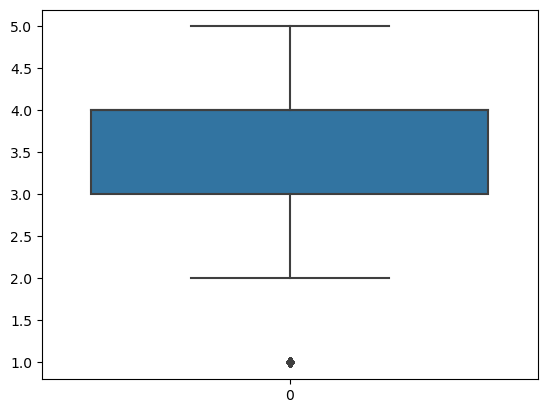

In [24]:
# Checking for outliers
sns.boxplot(df['rating'])

sns.

### <center>**Exploratory Data Analysis & Visualization**

In [25]:
# Create a DataFrame to store mean ratings and the number of ratings for each movie.
ratings_df = pd.DataFrame()

# Calculate the average rating for each movie using groupby and mean.
ratings_df['avg rating'] = df.groupby(by='title')['rating'].mean(numeric_only=True)

# Count the number of ratings for each movie using groupby and count.
ratings_df['count of ratings'] = df.groupby(by='title')[['rating']].count()

# Display the first few rows of the ratings DataFrame.
ratings_df.head()


,avg rating,count of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [26]:
# Checking for the top 5 movies with the highest number of ratings 
ratings_df.sort_values(by='count of ratings',ascending=False).head()

,avg rating,count of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [27]:
# Checking for the top 5 movies with the highest mean rating
ratings_df.sort_values(by='avg rating',ascending=False).head()


,avg rating,count of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3


Text(0.5, 1.0, 'Distribution of Ratings')

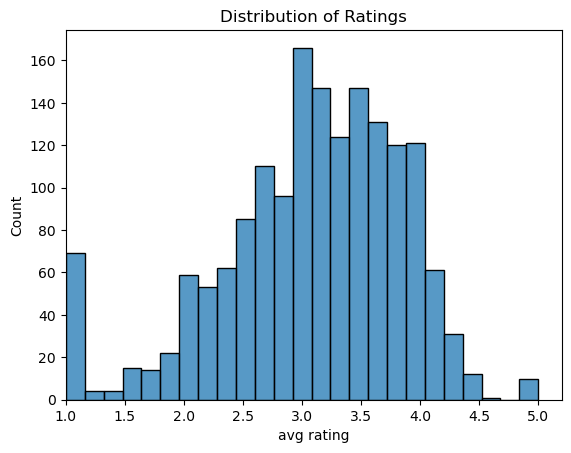

In [28]:
# Create a histogram to visualize the distribution of average ratings.
sns.histplot(ratings_df['avg rating'])

# Set the x-axis limit to start from 1 (assuming ratings are on a scale from 1 to 5).
plt.xlim((1))

# Set the title of the histogram.
plt.title("Distribution of Ratings")


Text(0.5, 1.0, 'Distribution of Number of Ratings')

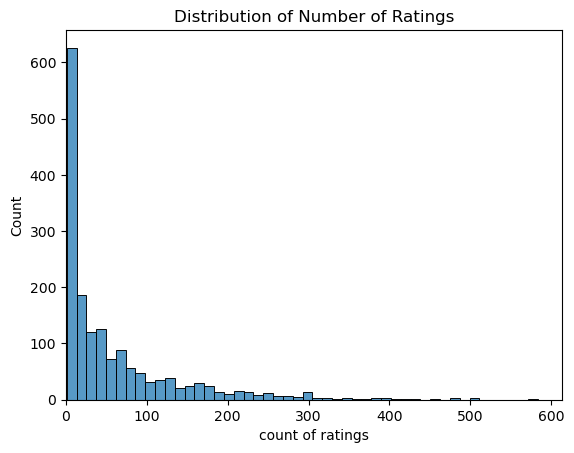

In [29]:
# Create a histogram to visualize the distribution of the number of ratings.
sns.histplot(ratings_df['count of ratings'])

# Set the x-axis limit to start from 0.
plt.xlim((0))

# Set the title of the histogram.
plt.title("Distribution of Number of Ratings")


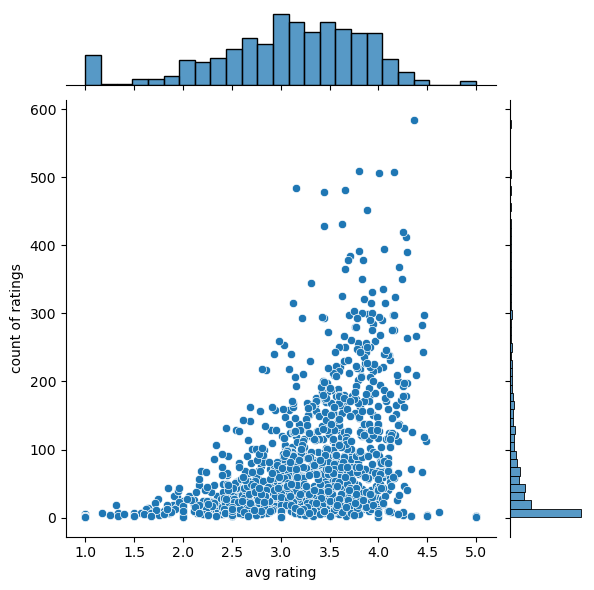

In [30]:
# Create a joint plot to visualize the relationship between average ratings and the number of ratings.
sns.jointplot(x=ratings_df['avg rating'], y=ratings_df['count of ratings'])


### <center>**Creating Our Movie Recommender System**

Rather than generating recommendations for every movie individually, we have designed a dynamic recommendation system in the form of a function. This function accepts three key parameters:

- **movie_name**: This parameter allows you to specify the movie for which you want to receive recommendations. Simply provide the name of the movie you're interested in, and the function will generate recommendations based on it.

- **ratings_cap**: To ensure the recommendations are meaningful and reliable, we've included a filter based on the minimum number of ratings a movie should have. Movies with ratings falling below this threshold will not be considered for recommendations. Adjust this parameter to control the level of popularity you require for the recommended movies.

- **recommendation_count**: Specify the number of recommendations you'd like to receive. The function will return a dynamic list of movies that are most strongly correlated with your chosen movie, based on user ratings and the provided criteria.


In [31]:

# Define the movie recommender function
def movie_recommender(movie_name, ratings_cap, recommendation_count):
    try:
        # Create a user-movie rating matrix
        movies_mat = df.pivot_table(index='user_id', columns='title', values='rating')

        # Extract ratings for the specified movie
        movie_series = movies_mat[movie_name]

        # Calculate movie correlations
        movie_corr = pd.DataFrame(movies_mat.corrwith(movie_series), columns=['correlation'])

        # Drop movies with NaN correlations
        movie_corr.dropna(inplace=True)

        # Merge with the ratings data to get the number of ratings
        movie_corr['Number of ratings'] = ratings_df['count of ratings']

        # Filter movies with a minimum number of ratings
        recommendations = pd.DataFrame(movie_corr[movie_corr['Number of ratings'] > ratings_cap]
                                       .sort_values(by='correlation', ascending=False)
                                       .head(recommendation_count))

        return recommendations

    except Exception as e:
        # Handle errors gracefully and return an empty DataFrame
        print(f"An error occurred: {e}")
        return pd.DataFrame()

In [32]:
# Example usage to obtain recommendations based on 'Star Wars (1977)'
recommendations = movie_recommender(movie_name='Star Wars (1977)', ratings_cap=100, recommendation_count=5)
recommendations

c:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,correlation,Number of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
